<div
style= "background-color: #f2f2f2;
        border: 2px solid #f2f2f2;
        color: #000000;
        border-radius: 5px;
        padding: 10px;
        font-family: David;">

# Final Project

## Alaa Sweed -- 318462959

</div>


# Phase 1: Importing the libraries

# imports:

## torch library: it is a scientific computing package that is used for deep learning applications

## torch.nn: it is a module that contains the neural network layers, and the loss functions

## torch.optim: it is a module that contains the optimization algorithms

## torchvision: it is a library that contains datasets, models, and transformations for computer vision applications


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

# Phase 2: Defining Data Transformations for Data Augmentation and Normalization

## Data Transformations:

Data transformations are essential for preparing the data before feeding it into the neural network.
They help in data augmentation and normalization, which improve the generalization of the model.

### Training Data Transformations:

- **RandomResizedCrop(224)**: Randomly crops the input image to a size of 224x224 pixels.
- **RandomHorizontalFlip()**: Randomly flips the input image horizontally with a probability of 0.5.
- **ToTensor()**: Converts the image to a PyTorch tensor.
- **Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])**: Normalizes the tensor with mean and standard deviation values specific to the ImageNet dataset.

### Validation Data Transformations:

- **Resize(256)**: Resizes the input image to 256x256 pixels.
- **CenterCrop(224)**: Crops the central region of the image to a size of 224x224 pixels.
- **ToTensor()**: Converts the image to a PyTorch tensor.
- **Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])**: Normalizes the tensor with mean and standard deviation values specific to the ImageNet dataset.


In [2]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



# Phase 3: Setting Up Data Directory and Creating Data Loaders

## Data Directory:

The data directory is the folder where the dataset is stored. It is essential to specify the correct path to ensure the data can be loaded properly.

- **data_dir = 'Dataset'**: Sets the path to the data directory. Here, the directory is named 'Dataset'.

## Creating Data Loaders:

Data loaders are used to load the dataset in batches.
This is useful for training and validating the model efficiently.

### Image Datasets:

- **datasets.ImageFolder**: A generic data loader where images are arranged in folders according to their class labels.

### Code Explanation:

- **image_datasets**: A dictionary that contains the datasets for both training and validation.
  - **x**: Refers to either 'train' or 'val'.
  - **os.path.join(data_dir, x)**: Constructs the path to the respective dataset folder.
  - **data_transforms[x]**: Applies the corresponding data transformations defined earlier.


In [3]:
data_dir = 'Dataset'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
print(image_datasets)

{'train': Dataset ImageFolder
    Number of datapoints: 260
    Root location: Dataset\train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), 'val': Dataset ImageFolder
    Number of datapoints: 140
    Root location: Dataset\val
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )}


# Phase 4: Creating Data Loaders and Retrieving Dataset Information

## Data Loaders:

Data loaders are crucial for efficiently loading data in batches during training and validation.
it is impotent to emphasis They also handle the shuffling of the data at every epoch, and multi-threaded data loading.

### Code Explanation:

- **dataloaders**: A dictionary that contains data loaders for both training and validation datasets.
  - **torch.utils.data.DataLoader**: A PyTorch utility for loading data.
  - **image_datasets[x]**: The dataset for 'train' or 'val'.
  - **batch_size=4**: Number of samples per batch to load.
  - **shuffle=True**: Whether to shuffle the data at every epoch.
  - **num_workers=4**: Number of subprocesses to use for data loading.

## Dataset Sizes:

It is helpful to know the size of the datasets to monitor training progress and performance.

### Code Explanation:

- **dataset_sizes**: A dictionary that contains the number of samples in the training and validation datasets.
  - **len(image_datasets[x])**: Returns the number of samples in the dataset.

## Class Names:

Retrieving the class names helps in understanding the labels associated with the dataset.

### Code Explanation:

- **class_names**: The class labels in the training dataset.
  - **image_datasets['train'].classes**: Accesses the class labels from the training dataset.


In [4]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 260, 'val': 140}


['Maddona', 'cannot_enter']

# Phase 5: Loading and Modifying the Pre-trained ResNet-18 Model

## Loading the Pre-trained Model:

Pre-trained models are models that have been previously trained on large datasets. These models can be fine-tuned for specific tasks, saving time and computational resources.

### Code Explanation:

- **model = models.resnet18(pretrained=True)**: Loads the ResNet-18 model pre-trained on the ImageNet dataset.

### resnet18 Model:

ResNet-18 is a popular deep learning model known for its simplicity and effectiveness. It consists of 18 layers and has shown excellent performance on various computer vision tasks.

## Freezing Layers:

Freezing layers means that the weights of those layers will not be updated during training. This is useful for transfer learning, where we only want to fine-tune the final layers for our specific task.

### Code Explanation:

- **for name, param in model.named_parameters()**: Iterates through all the parameters in the model.
  - **if "fc" in name**: Checks if the parameter belongs to the final classification layer.
    - **param.requires_grad = True**: Unfreezes the final classification layer.
  - **else**: For all other layers.
    - **param.requires_grad = False**: Freezes the layer.

## Loss Function and Optimizer:

The loss function measures how well the model's predictions match the actual labels.
The optimizer updates the model's parameters to minimize the loss.

### Code Explanation:

- **criterion = nn.CrossEntropyLoss()**: Defines the loss function as cross-entropy loss, which is suitable for multi-class classification tasks.
- **optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)**: Defines the optimizer as stochastic gradient descent (SGD) with a learning rate of 0.001 and momentum of 0.9. It updates all the parameters of the model.

## Moving the Model to GPU(only if available):

Using a GPU for model training and inference can significantly speed up the computations.

### Code Explanation:

- **device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")**: Checks if a GPU is available and sets the device accordingly.
- **model = model.to(device)**: Moves the model to the specified device.


In [5]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Phase 6: Training Loop

## Training Loop:

The training loop is where the model learns from the data. It involves iterating over the data multiple times (epochs) and updating the model parameters to minimize the loss.

### Code Explanation:

- **num_epochs = 10**: Specifies the number of times the entire dataset will be passed through the model.
- **for epoch in range(num_epochs)**: Loops over the dataset multiple times.

### Phase Handling:

- **for phase in ['train', 'val']**: Handles both training and validation phases.
  - **if phase == 'train': model.train()**: Sets the model to training mode.
  - **else: model.eval()**: Sets the model to evaluation mode.

### Running Loss and Correct Predictions:

- **running_loss = 0.0**: Initializes the running loss for the current epoch.
- **running_corrects = 0**: Initializes the count of correct predictions.

### Data Loading and Moving to Device:

- **for inputs, labels in dataloaders[phase]**: Iterates over the data in batches.
  - **inputs = inputs.to(device)**: Moves the input data to the specified device (CPU or GPU).
  - **labels = labels.to(device)**: Moves the labels to the specified device.

### Zeroing the Gradients:

- **optimizer.zero_grad()**: Zeros the gradient buffers of all parameters.

### Forward and Backward Pass:

- **with torch.set_grad_enabled(phase == 'train')**: Enables gradient calculation only in training phase.
  - **outputs = model(inputs)**: Performs a forward pass.
  - **\_, preds = torch.max(outputs, 1)**: Gets the predicted class.
  - **loss = criterion(outputs, labels)**: Computes the loss.

### Backward Pass and Optimization:

- **if phase == 'train': loss.backward()**: Computes the gradient of the loss.
- **optimizer.step()**: Updates the model parameters.

### Accumulating Loss and Accuracy:

- **running_loss += loss.item() \* inputs.size(0)**: Accumulates the loss.
- **running_corrects += torch.sum(preds == labels.data)**: Accumulates the correct predictions.

### Calculating Epoch Loss and Accuracy:

- **epoch_loss = running_loss / dataset_sizes[phase]**: Calculates the average loss for the epoch.
- **epoch_acc = running_corrects.double() / dataset_sizes[phase]**: Calculates the accuracy for the epoch.

### Printing Results:

- **print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')**: Prints the loss and accuracy for each phase.

### Completion Message:

- **print("Training complete!")**: Prints a message indicating the completion of training.


In [6]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")


train Loss: 2.2659 Acc: 0.5923
val Loss: 0.9240 Acc: 0.6429
train Loss: 0.5873 Acc: 0.7731
val Loss: 0.8125 Acc: 0.7500
train Loss: 0.4341 Acc: 0.8077
val Loss: 0.3292 Acc: 0.8714
train Loss: 0.4829 Acc: 0.8077
val Loss: 1.0431 Acc: 0.7286
train Loss: 0.4513 Acc: 0.8346
val Loss: 0.2769 Acc: 0.8786
train Loss: 0.3367 Acc: 0.8500
val Loss: 0.2655 Acc: 0.8786
train Loss: 0.3102 Acc: 0.8769
val Loss: 0.2806 Acc: 0.8714
train Loss: 0.3079 Acc: 0.8769
val Loss: 0.2092 Acc: 0.9214
train Loss: 0.3075 Acc: 0.8769
val Loss: 0.1876 Acc: 0.9286
train Loss: 0.3209 Acc: 0.8808
val Loss: 0.4853 Acc: 0.7786
Training complete!


# Phase 7: Saving the Model

## Saving the Model:

After training the model, we save the model's parameters so that it can be reused or deployed without needing to retrain it.

### Code Explanation:

- **torch.save(model.state_dict(), 'Madonna_classification_model.pth')**: Saves the state dictionary of the model to a file named 'Madonna_classification_model.pth'. The state dictionary contains the parameters of the model.


In [7]:

# Save the model
torch.save(model.state_dict(), 'Madonna_classification_model.pth')


# Classification on Unseen Image


# Phase 8: Loading and Modifying the Saved Model for Classification on Unseen Image

## Loading the Saved Model:

To use the trained model for inference, we have to load the saved model parameters.

### Code Explanation:

- **model = models.resnet18(pretrained=True)**: Loads the ResNet-18 model pre-trained on the ImageNet dataset.
- **model.fc = nn.Linear(model.fc.in_features, 1000)**: Adjusts the final fully connected layer to match the original model's output units.
- **model.load_state_dict(torch.load('Madonna_classification_model.pth'))**: Loads the saved state dictionary from the file 'Madonna_classification_model.pth'.
- **model.eval()**: Sets the model to evaluation mode, disabling dropout and batch normalization layers.

## Creating a New Model:

To adapt the model for a different number of output classes, you can create a new model and copy the relevant parameters from the loaded model.

### Code Explanation:

- **new_model = models.resnet18(pretrained=True)**: Loads a new instance of the ResNet-18 model pre-trained on the ImageNet dataset.
- **new_model.fc = nn.Linear(new_model.fc.in_features, 2)**: Adjusts the final fully connected layer to match the desired output units (2 classes in this case).

### Copying Weights and Biases:

To ensure the new model retains the learned features, copy the weights and biases from the loaded model.

### Code Explanation:

- **new_model.fc.weight.data = model.fc.weight.data[0:2]**: Copies the weights of the first 2 output units from the loaded model.
- **new_model.fc.bias.data = model.fc.bias.data[0:2]**: Copies the biases of the first 2 output units from the loaded model.


In [8]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('Madonna_classification_model.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]




# Phase 9: Loading and Preprocessing an Unseen Image(AKA Inference)

## **now we shell Prepare the new image for classification.**

**for this, we would use the same data transformations you used during training.**

## Loading an Image:

To make predictions using the trained model, we need to load and preprocessed image to match the input requirements of the model.

### Code Explanation:

- **image_path = 'm8.jpg'**: Sets the path to the image you want to classify.
- **image = Image.open(image_path)**: Opens the image file using the PIL library.

## Preprocessing the Image:

The image must be preprocessed in the same way as the training and validation images to ensure consistent results.

### Preprocessing Steps:

- **transforms.Resize(256)**: Resizes the image to 256x256 pixels.
- **transforms.CenterCrop(224)**: Crops the central region of the image to 224x224 pixels.
- **transforms.ToTensor()**: Converts the image to a PyTorch tensor.
- **transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])**: Normalizes the tensor with mean and standard deviation values specific to the ImageNet dataset.

### Code Explanation:

- **preprocess = transforms.Compose([...])**: Defines a sequence of transformations to preprocess the image.
- **input_tensor = preprocess(image)**: Applies the preprocessing transformations to the image.
- **input_batch = input_tensor.unsqueeze(0)**: Adds a batch dimension to the tensor, making it suitable for input to the model.


In [9]:
# Load and preprocess the unseen image
image_path = 'm_no2.jpg'  # Replace with the path to your image
# image_path = 'me2.jpg'  # Replace with the path to your image
# image_path = 'm4.jpg'  # Replace with the path to your image
# image_path = 'm1.jpg'  # Replace with the path to your image
# image_path = 'm8.jpg'  # Replace with the path to your image
# image_path = 'm6.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


# Phase 10: Performing Inference on the Preprocessed Image

## Performing Inference:

Inference is the process of making predictions using the trained model on new, unseen data.

### Code Explanation:

- **with torch.no_grad()**: Disables gradient calculation, which is not needed during inference, saving memory and computations.
  - **output = model(input_batch)**: Feeds the preprocessed image to the model and gets the output.

## Getting the Predicted Class:

The model's output is a set of class probabilities. The class with the highest probability is the predicted class.

### Code Explanation:

- **\_, predicted_class = output.max(1)**: Gets the index of the class with the highest probability.

## Mapping the Predicted Class to the Class Name:

The predicted class index is mapped to the corresponding class name.

### Code Explanation:

- **class_names = ['madonna', 'you are Not Madonna! You Cannot Enter']**: List of class names corresponding to the class indices. Ensure these class names match your training data.
- **predicted_class_name = class_names[predicted_class.item()**: Maps the predicted class index to the class name.

## Printing the Predicted Class:

The final step is to print the name of the predicted class.

### Code Explanation:

- **print(f'The predicted class is: {predicted_class_name}')**: Prints the predicted class name.


In [10]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['madonna', 'you are Not Madonna! You Cannot Enter']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: you are Not Madonna! You Cannot Enter


# Phase 11: Displaying the Image with the Predicted Class Name

## Displaying the Image:

Visualizing the image along with the predicted class name helps in understanding and verifying the model's predictions.

### Code Explanation:

- **import numpy as np**
- **import matplotlib.pyplot as plt**
- **from PIL import Image**

### Displaying the Image:

- **image = np.array(image)**: Converts the PIL image to a NumPy array.
- **plt.imshow(image)**: Displays the image.
- **plt.axis('off')**: Hides the axis.
- **plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')**: Adds a text annotation to the image with the predicted class name.
- **plt.show()**: Displays the image with the annotation.


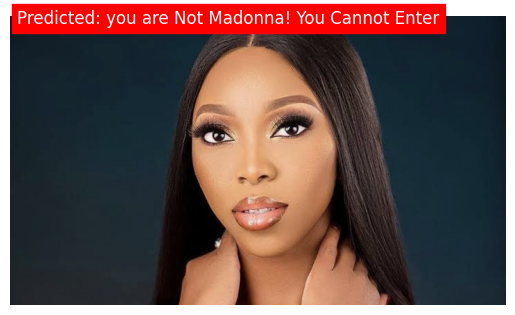

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()